In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

In [2]:
def load_data():

    datagen = ImageDataGenerator(rescale = 1/255)
    
    
    test_it = datagen.flow_from_directory ('test/', target_size = (256, 256), 
                                            class_mode = 'categorical', color_mode="rgb", batch_size=64, seed = 1,  shuffle=False)
    
    return test_it

test_it = load_data()

Found 1700 images belonging to 17 classes.


In [3]:
model_ResNet_original = load_model('ResNet_original_87_final.h5')

In [4]:
model_ResNet_Augmented = load_model('ResNet_augmented_90_final.h5')

In [5]:
model_CNN_augmented = load_model('CNN_Augmented_84_final')

In [6]:
model_CNN_original = load_model ('CNN_original_79_final')

In [7]:
class_names = list(test_it.class_indices.keys())

# CNN with Original Data

In [8]:
test_it.reset()
preds = model_CNN_original.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)
print(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices))

              precision    recall  f1-score   support

        1977       0.74      1.00      0.85       100
       Amaro       0.77      0.62      0.69       100
     Brannan       0.70      0.81      0.75       100
   Clarendon       0.75      0.66      0.70       100
     Gingham       0.71      0.86      0.78       100
       He-Fe       0.82      0.89      0.85       100
      Hudson       0.87      0.92      0.89       100
       Lo-Fi       0.61      0.57      0.59       100
     Mayfair       0.75      0.78      0.76       100
   Nashville       0.87      1.00      0.93       100
    Original       0.59      0.36      0.45       100
    Perpetua       0.82      0.86      0.84       100
       Sutro       0.95      0.88      0.91       100
     Toaster       0.94      0.98      0.96       100
    Valencia       0.66      0.47      0.55       100
      Willow       1.00      1.00      1.00       100
     X-ProII       0.87      0.85      0.86       100

    accuracy              

In [9]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

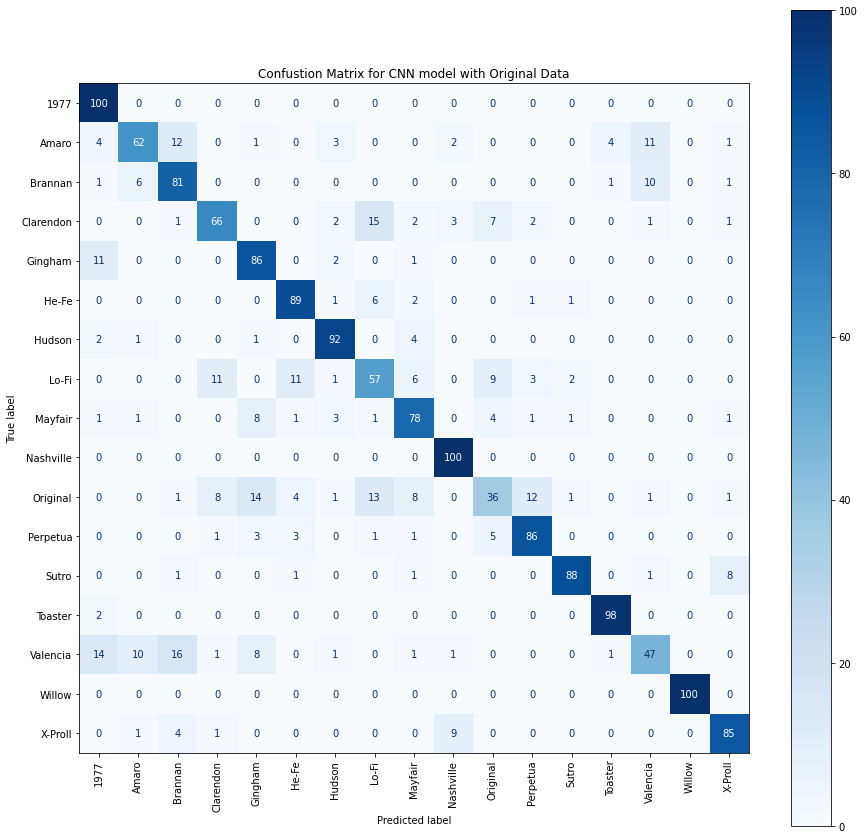

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for CNN model with Original Data')
plt.xticks(rotation=90)
plt.show();

# CNN with Augmented Data

In [11]:
test_it.reset()
preds = model_CNN_augmented.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)
print(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices))

              precision    recall  f1-score   support

        1977       0.91      0.91      0.91       100
       Amaro       0.72      0.83      0.77       100
     Brannan       0.98      0.95      0.96       100
   Clarendon       0.71      0.70      0.70       100
     Gingham       0.86      0.83      0.84       100
       He-Fe       0.77      0.89      0.83       100
      Hudson       0.84      0.92      0.88       100
       Lo-Fi       0.53      0.71      0.61       100
     Mayfair       0.72      0.77      0.74       100
   Nashville       0.98      0.98      0.98       100
    Original       0.69      0.48      0.56       100
    Perpetua       0.94      0.87      0.90       100
       Sutro       0.98      0.94      0.96       100
     Toaster       1.00      0.92      0.96       100
    Valencia       0.89      0.71      0.79       100
      Willow       0.99      1.00      1.00       100
     X-ProII       0.99      0.94      0.96       100

    accuracy              

In [12]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

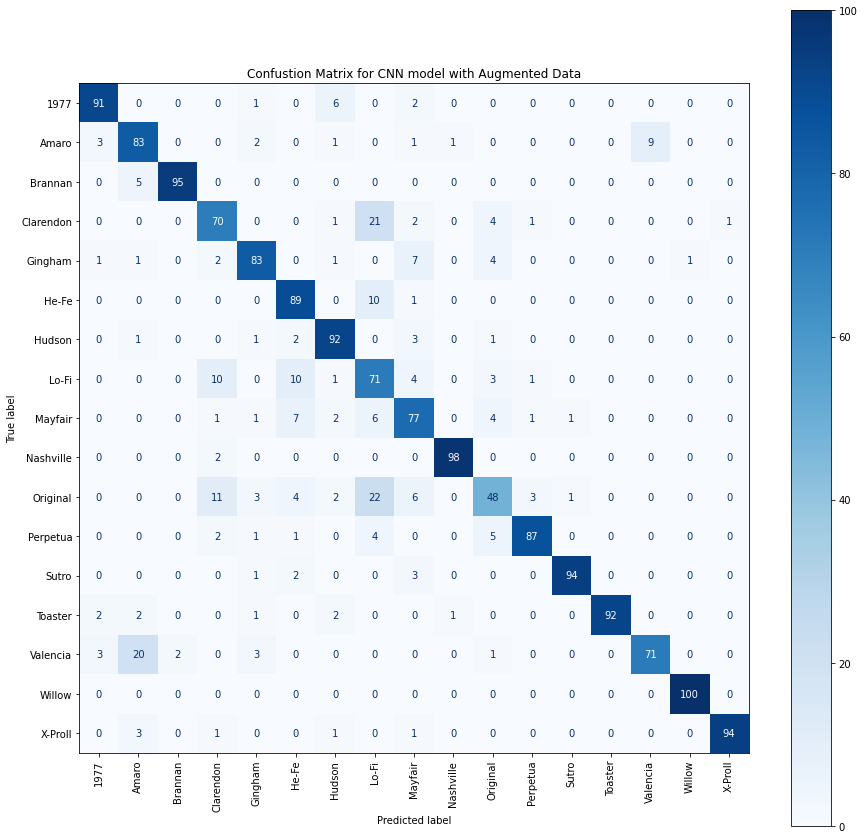

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for CNN model with Augmented Data')
plt.xticks(rotation=90)
plt.show();

# ResNet with Original Data

In [14]:
test_it.reset()
preds = model_ResNet_original.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)
print(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices))

              precision    recall  f1-score   support

        1977       0.94      0.98      0.96       100
       Amaro       0.77      0.83      0.80       100
     Brannan       0.83      0.95      0.88       100
   Clarendon       0.84      0.75      0.79       100
     Gingham       0.83      1.00      0.90       100
       He-Fe       0.93      0.85      0.89       100
      Hudson       0.92      0.90      0.91       100
       Lo-Fi       0.73      0.82      0.77       100
     Mayfair       0.79      0.95      0.86       100
   Nashville       0.99      0.85      0.91       100
    Original       0.69      0.60      0.64       100
    Perpetua       0.93      0.81      0.87       100
       Sutro       0.89      0.97      0.93       100
     Toaster       0.98      0.93      0.95       100
    Valencia       0.83      0.68      0.75       100
      Willow       0.98      0.98      0.98       100
     X-ProII       0.96      0.90      0.93       100

    accuracy              

In [15]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

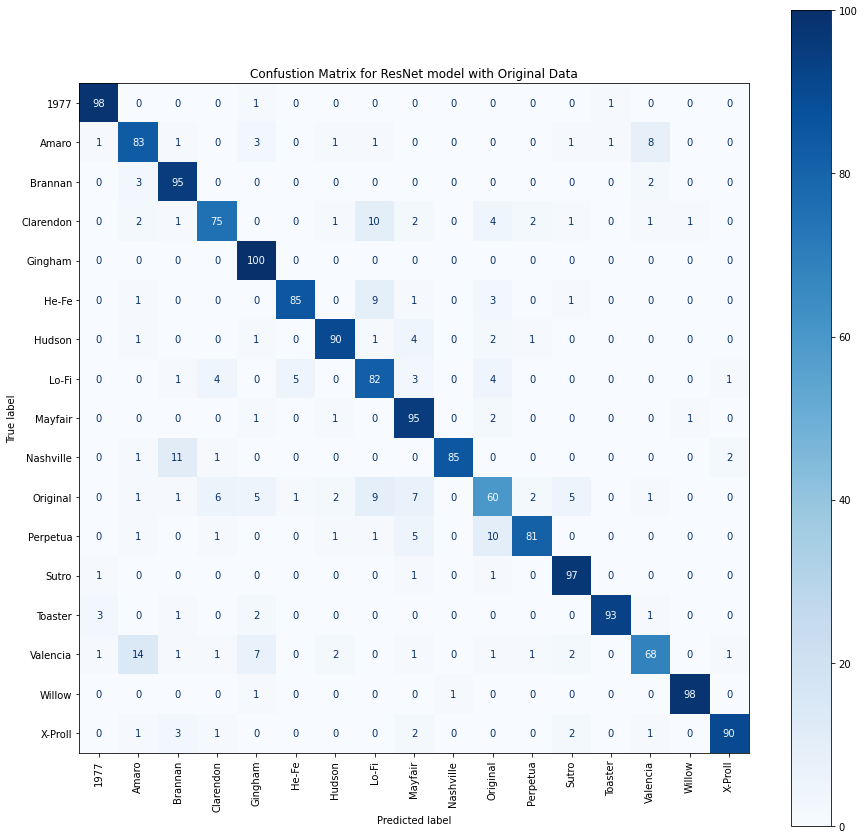

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for ResNet model with Original Data')
plt.xticks(rotation=90)
plt.show();

# ResNet with Augmented Data

In [17]:
test_it.reset()
preds = model_ResNet_original.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)
print(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices))

              precision    recall  f1-score   support

        1977       0.94      0.98      0.96       100
       Amaro       0.77      0.83      0.80       100
     Brannan       0.83      0.95      0.88       100
   Clarendon       0.84      0.75      0.79       100
     Gingham       0.83      1.00      0.90       100
       He-Fe       0.93      0.85      0.89       100
      Hudson       0.92      0.90      0.91       100
       Lo-Fi       0.73      0.82      0.77       100
     Mayfair       0.79      0.95      0.86       100
   Nashville       0.99      0.85      0.91       100
    Original       0.69      0.60      0.64       100
    Perpetua       0.93      0.81      0.87       100
       Sutro       0.89      0.97      0.93       100
     Toaster       0.98      0.93      0.95       100
    Valencia       0.83      0.68      0.75       100
      Willow       0.98      0.98      0.98       100
     X-ProII       0.96      0.90      0.93       100

    accuracy              

In [18]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

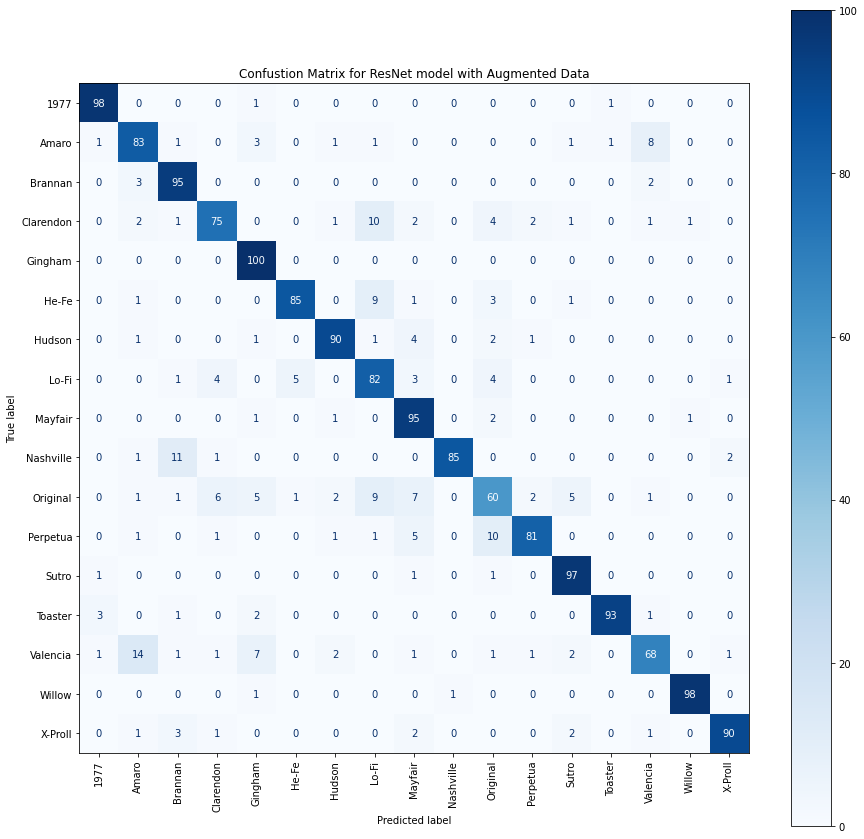

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for ResNet model with Augmented Data')
plt.xticks(rotation=90)
plt.show();